# C1000-112 シラバスベースの学習

+ IBM Certified Associate Developer - Quantum Computation using Qiskit v0.2X
  + Exam C1000-112: Fundamentals of Quantum Computation Using Qiskit v0.2X Developer
  + <https://www.ibm.com/training/certification/C0010300>
+ シラバスの項目ごとに実装を確認する。（Google Colaboratory で作成）

## ライブラリ準備

In [ ]:
# The latest version of 0.2X
!pip install Qiskit==0.29.1

In [ ]:
!pip install pylatexenc

## Import, CONST

In [ ]:
import qiskit
from qiskit import (QuantumCircuit, 
                    QuantumRegister, 
                    ClassicalRegister,
                    execute, 
                    Aer, 
                    BasicAer, 
                    assemble, 
                    transpile,
                    IBMQ)
from qiskit.circuit.library import (XGate,
                                    CXGate)
from qiskit.extensions import UnitaryGate
from qiskit.providers.ibmq import least_busy
from qiskit.qasm import Qasm
from qiskit.quantum_info import (Statevector,
                                 Pauli,
                                 state_fidelity,
                                 process_fidelity,
                                 average_gate_fidelity)
from qiskit.quantum_info.operators import Operator
from qiskit.tools.monitor import (backend_monitor,
                                  backend_overview,
                                  job_monitor)
from qiskit.visualization import (plot_histogram, 
                                  plot_bloch_multivector,
                                  plot_state_qsphere, 
                                  plot_state_city,
                                  plot_state_paulivec,
                                  plot_bloch_vector,
                                  plot_state_hinton,
                                  plot_gate_map,
                                  plot_error_map)
import numpy as np
from math import (pi,
                  sqrt)

In [ ]:
# IBM Q Experience の API KEY を設定
API_TOKEN = 'API KEY を設定'

## Section 1: Perform Operations on Quantum Circuits

### 1.Construct multi-qubit quantum registers

+ 複数量子ビットのレジスタを構築する。
+ <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html>

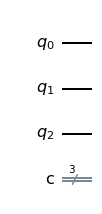

In [ ]:
# 回路を直接構築
circ = QuantumCircuit(3, 3) #量子ビット数、古典ビット数を指定

circ.draw('mpl')

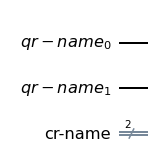

In [ ]:
# 古典レジスタ、量子レジスタから回路を構築
# 構築する単位で名前を付けられる（但し、Qasmの制約により小文字のみ）
cr = ClassicalRegister(2, 'cr-name') 
qr = QuantumRegister(2, 'qr-name')
circ = QuantumCircuit(qr, cr)

circ.draw('mpl')

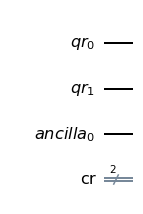

In [ ]:
# レジスタの役割ごと名称を分ける方法（あとでわかりやすい）
cr = ClassicalRegister(2, 'cr')
qr = QuantumRegister(2, 'qr')
an = QuantumRegister(1, 'ancilla')
circ = QuantumCircuit(cr, qr, an)

circ.draw('mpl')

### 2.Measure quantum circuits in classical registers



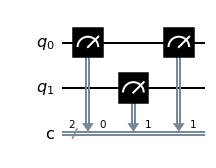

In [ ]:
circ = QuantumCircuit(2,2)

# 測定をひとつずつ設定
circ.measure(0,0)
circ.measure(1,1)
circ.measure(0,1) #量子レジスタ、古典レジスタの順

circ.draw('mpl')

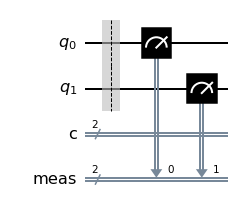

In [ ]:
circ = QuantumCircuit(2,2)

# 測定をまとめて設定
# 全体のbarrierが自動で入る
circ.measure_all()

circ.draw('mpl')

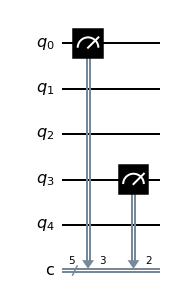

In [ ]:
circ = QuantumCircuit(5,5)

# 測定対象のリスト指定
circ.measure([0,3], [3,2])

circ.draw('mpl')

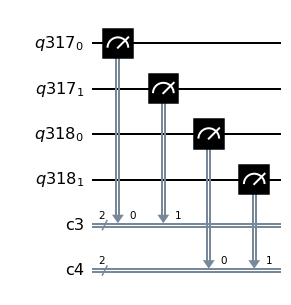

In [ ]:
qr1 = QuantumRegister(2)
qr2 = QuantumRegister(2)
cr1 = ClassicalRegister(2)
cr2 = ClassicalRegister(2)

circ = QuantumCircuit(qr1, qr2, cr1, cr2)

# 構築したレジスタ単位で測定
circ.measure(qr1, cr1)
circ.measure(qr2, cr2)

circ.draw('mpl')

In [ ]:
# 量子レジスタと測定をそれぞれ構築し結合

circ1 = QuantumCircuit(2)
circ1.h(0)
circ1.cx(0,1)

circ2  = QuantumCircuit(2)
circ2.measure_all()

circ1.combine(circ2).draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [ ]:
# 「+」でも結合できる
(circ1 + circ2).draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

### 3.Use single-qubit gates

+ パウリゲート：$X,Y,Z$
+ クリフォードゲート：$H、S、S^†、T、T^†$
+ <https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/3_summary_of_quantum_operations.html>

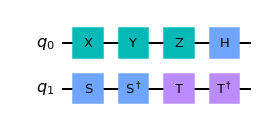

In [ ]:
circ = QuantumCircuit(2)

circ.x(0)
circ.y(0)
circ.z(0)
circ.h(0)
circ.s(1)
circ.sdg(1)
circ.t(1)
circ.tdg(1)

circ.draw('mpl')


+ $U_3$ゲート
+ 標準回転ゲート：$R_x, R_y, R_z$

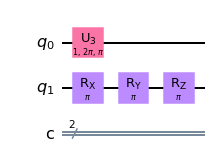

In [ ]:
circ = QuantumCircuit(2, 2)

circ.u3(1, 2*pi, pi, 0) # 適用する量子レジスタは最後に指定（他も同じ）
circ.rx(pi, 1)
circ.ry(pi, 1)
circ.rz(pi, 1)

circ.draw('mpl')

### 4.Use multi-qubit gates

<https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/3_summary_of_quantum_operations.html>

+ 制御パウリゲート：$C_X, C_Y, C_Z$
+ 制御アダマールゲート：$C_H$
+ 制御回転ゲート：$C_{R_Z}$
+ 制御位相回転：$C_P$
+ 制御u回転：$C_U$


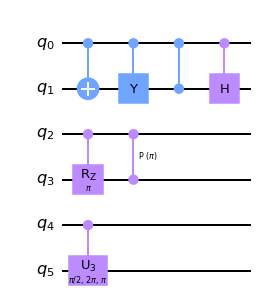

In [ ]:
circ = QuantumCircuit(6)

# 制御ビット、ターゲットビットの順
circ.cx(0, 1)
circ.cy(0, 1)
circ.cz(0, 1)
circ.ch(0, 1)

# パラメータ、制御ビット、ターゲットビットの順
circ.crz(pi, 2, 3)
circ.cp(pi, 2, 3)

# パラメータ×３、制御ビット、ターゲットビットの順
circ.cu3(pi/2, 2*pi, pi, 4, 5)

circ.draw('mpl')

+ SWAPゲート
+ 3量子ビットケート：Toffoliゲート（CCXゲート）、制御SWAPゲート

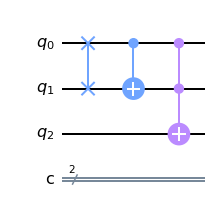

In [ ]:
circ = QuantumCircuit(3, 2)

circ.swap(0, 1)

# 制御ビット、ターゲットビット の順
circ.cnot(0, 1)

# 制御ビット、制御ビット、ターゲットビット の順
circ.ccx(0, 1, 2)

circ.draw('mpl')

### 5.Use barrier operations


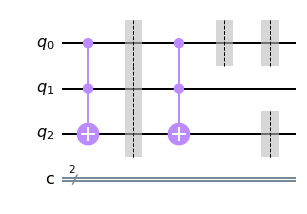

In [ ]:
circ = QuantumCircuit(3, 2)

circ.ccx(0, 1, 2)

# 全量子レジスタ
circ.barrier()

circ.ccx(0, 1, 2)

# 指定した量子レジスタ
circ.barrier(0)     #単一
circ.barrier([0,2]) #複数（配列指定）

circ.draw('mpl')

### 6.Return the circuit depth

+ <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.depth.html>
+ Return circuit depth (i.e., length of critical path). This does **not include** compiler or simulator directives such as **‘barrier’ or ‘snapshot’** .

depth: 4


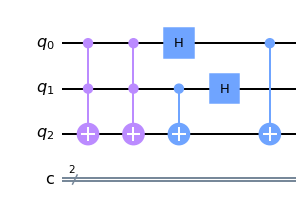

In [ ]:
circ = QuantumCircuit(3, 2)

circ.ccx(0, 1, 2)
circ.ccx(0, 1, 2)
circ.h(0)
#circ.barrier()
circ.cx(1,2)
circ.h(1)
#circ.barrier()
circ.cx(0,2)

print('depth:', circ.depth()) # depthは回路を前詰めにした層数でカウント
circ.draw('mpl')

depth: 6


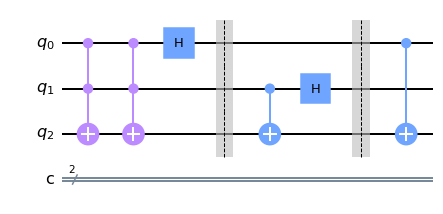

In [ ]:
circ = QuantumCircuit(3, 2)

circ.ccx(0, 1, 2)
circ.ccx(0, 1, 2)
circ.h(0)
circ.barrier()
circ.cx(1,2)
circ.h(1)
circ.barrier()
circ.cx(0,2)

print('depth:', circ.depth()) # barrierはカウントしないが、barrierまたぎの回路は前詰めされない（barrierがなかったことになるわけではない）
circ.draw('mpl')

### 7.Extend quantum circuits

+ <https://qiskit.org/documentation/stubs/qiskit.extensions.Initialize.html>
+ <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html>

#### Initializeによる初期化

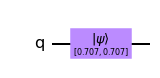

In [ ]:
qc = QuantumCircuit(1)

# 以下のように指定する
#initial_state = [0, 1]
#initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
initial_state = [1/sqrt(2), 1/sqrt(2)] # 重ね合わせ状態

# 但し、振幅の２乗の合計が１でないとエラーになる
#initial_state = [1/sqrt(2), 1/sqrt(3)] # error

qc.initialize(initial_state, 0)
qc.draw('mpl')

In [ ]:
# 測定すると収束する。測定しなければ状態ベクトルのままになる。
#qc.measure_all()
#qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
out_state = result.get_statevector()
print(out_state)

[0.70710678+0.j 0.70710678+0.j]


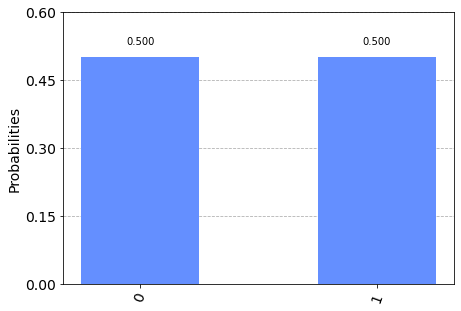

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

#### InitializeによるBell-State

In [ ]:
qc = QuantumCircuit(2)

# 00,01,10,11 のうち 00,11 の振幅を指定する
v = [1/sqrt(2), 0, 0, 1/sqrt(2)]

# 振幅を２つの量子ビットに適用（Initialize）する
qc.initialize(v,[0,1])

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [ ]:
qc.draw()

┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  Initialize(0.70711,0,0,0.70711) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘

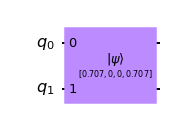

In [ ]:
qc.draw('mpl')

#### UnitaryGateの構築

In [ ]:
# Unitaryゲートを直接構築できる
unitary = UnitaryGate([[1,0],[0,1]])
unitary.to_matrix()

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### 8.Return the OpenQASM string for a circuit

+ OpenQasm String の取得
+ <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.qasm.html>

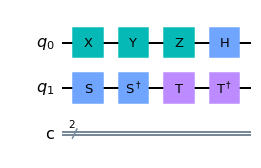

In [ ]:
# 回路の準備
circ = QuantumCircuit(2, 2)

circ.x(0)
circ.y(0)
circ.z(0)
circ.h(0)
circ.s(1)
circ.sdg(1)
circ.t(1)
circ.tdg(1)

circ.draw('mpl')

In [ ]:
circ.qasm(formatted=True) #formattedがTrueだとカラーになる。

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
x q[0];
y q[0];
z q[0];
h q[0];
s q[1];
sdg q[1];
t q[1];
tdg q[1];



## Section 2: Executing Experiments

### 1.Execute a quantum circuit

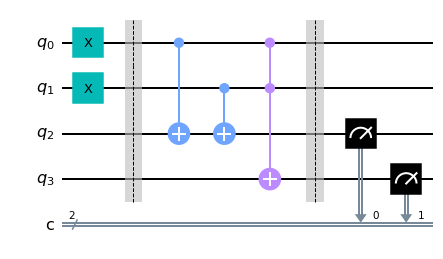

In [ ]:
# 半加算器を実行する

qc_ha = QuantumCircuit(4, 2)

qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0, 2)
qc_ha.cx(1, 2)

qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0) #1桁目として測定
qc_ha.measure(3,1) #2桁目として測定

qc_ha.draw('mpl')

In [ ]:
backend = Aer.get_backend('aer_simulator')

#### backendから実行

+ コンパイラ（assemble, transpileなど）はなくても動作する。
+ <https://qiskit.org/documentation/apidoc/compiler.html>

In [ ]:
qobj = assemble(qc_ha) # この行はなくても実行可。
result = backend.run(qobj).result()
counts = result.get_counts()
print(counts)

{'10': 1024}


In [ ]:
circ = transpile(qc_ha, backend) # この行はなくても実行可。
result = backend.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'10': 1024}


#### executeから実行

+ <https://qiskit.org/documentation/apidoc/execute.html>

In [ ]:
result = execute(qc_ha, backend).result()
result.get_counts()

{'10': 1024}

## Section 3: Implement BasicAer: Python-based Simulators


### 1.Use the available simulators

#### Avialable Simulators

In [ ]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

+ aer_simulator：実際の量子コンピュータを模倣するように動作。
  + 関連するシミュレータ（statevector, density_matirx, stabilizer, matrix_product_state）は、理想的な回路のシミュレートにおいて差異はない。
  + <https://qiskit.org/documentation/locale/ja_JP/tutorials/simulators/1_aer_provider.html>
+ qasm_simulator : 実際の量子コンピュータと対話しているように動作。get_statevector() は使用できない。
+ statevector_simulator : 測定前の量子状態を見ることができる。
+ unitary_simulator()：ユニタリ行列をシミュレートする。

#### Aer Simulator

+ measure が必要。
+ カウントが取得できる。

{'11': 498, '00': 526}


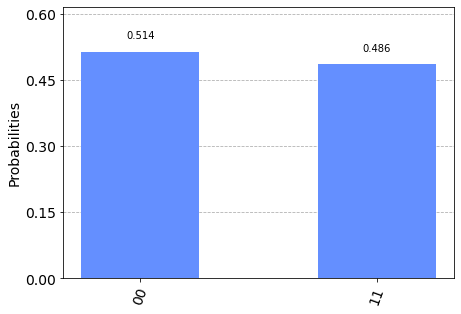

In [ ]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

backend = Aer.get_backend('aer_simulator')
circ = transpile(circ, backend)
result = backend.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)

#### Qasm Simulator

+ measure が必要。

{'00': 496, '11': 528}


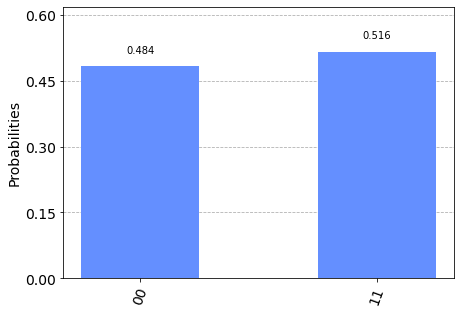

In [ ]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

simulator = Aer.get_backend('qasm_simulator')
#circ = transpile(circ, simulator) # QasmSimulatorではTranspileはできない

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)

#### Statevector Simulator

+ 実行回数は1回になる。
+ 状態ベクトルを取得できる。

{'11': 1}


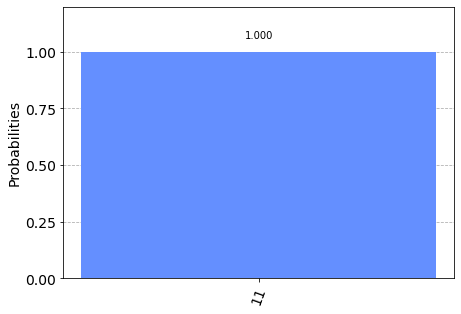

In [ ]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

simulator = Aer.get_backend('statevector_simulator')
#circ = transpile(circ, simulator) # 同じく、Transpileはできない

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)

#### Unitary Simulator

+ ユニタリ行列を計算するためのバックエンド。

In [ ]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u(pi/2,pi/2,pi/2,q) #u3-gate
qc.draw()

┌────────────────┐
q412_0: ┤ U(π/2,π/2,π/2) ├
        └────────────────┘

In [ ]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
#result.get_counts() # このシミューレタではカウントは取れない（エラーになる）
result.get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

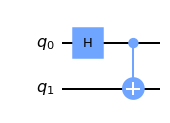

In [ ]:
# 別パターン１
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(circ, backend))
result = job.result()
result.get_unitary(circ, decimals=3)

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

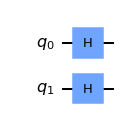

In [ ]:
# 別パターン２
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(circ, backend))
result = job.result()
result.get_unitary(circ, decimals=3)

array([[ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

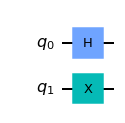

In [ ]:
# 別パターン３
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(circ, backend))
result = job.result()
result.get_unitary(circ, decimals=3)

array([[ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

## Section 4: Implement Qasm


### 1.Read a QASM file and string

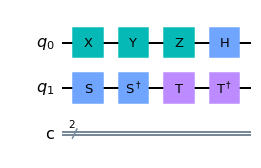

In [ ]:
# 回路準備
circ = QuantumCircuit(2, 2)

circ.x(0)
circ.y(0)
circ.z(0)
circ.h(0)
circ.s(1)
circ.sdg(1)
circ.t(1)
circ.tdg(1)

circ.draw('mpl')

#### ファイル保存＆読込み

+ https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.from_qasm_file.html
+ https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.qasm.Qasm.html

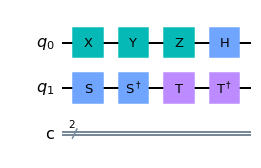

In [ ]:
# OpenQasm File の保存
circ.qasm(filename='qasm.txt', encoding='utf-8')

# OpenQasm File の読込み
circ = QuantumCircuit.from_qasm_file(path=('./qasm.txt'))
circ.draw('mpl')

In [ ]:
qasm = Qasm(filename='./qasm.txt')
print(qasm.return_filename())

./qasm.txt


#### Strでの出力＆読み込み

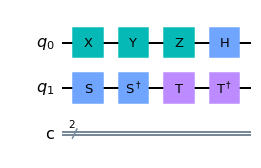

In [ ]:
# OpenQasm Str の出力
# https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.qasm.html
qasm_str = circ.qasm()

# OpenQasm Str の読み込み
# https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.from_qasm_str.html
circ = QuantumCircuit.from_qasm_str(qasm_str)
circ.draw('mpl')

## Section 5: Compare and Contrast Quantum Information


### 1.Use classical and quantum registers


In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

In [ ]:
# Statevector 利用パターン
# https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.quantum_info.Statevector.html

qc = QuantumCircuit(1, 1)

qc.h(0)
qc.s(0)

outputstate = Statevector.from_label("0").evolve(qc) #初期状態が0になる

plot_bloch_multivector(outputstate)

### 2.Use operators

https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits_advanced/02_operators_overview.html

#### 配列からの構築

In [ ]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])

print(XX)
print()
print(XX.data)
print()
input_dim, output_dim = XX.dim
print(input_dim, output_dim)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

4 4


In [ ]:
op = Operator(np.random.rand(2 ** 1, 2 ** 2))
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (2, 2)
Output dimensions: (2,)


#### クラスからの変換

In [ ]:
# Pauli
px = Pauli(label='X')
Operator(px)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [ ]:
# Gateクラス
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

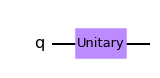

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
op = Operator(qc)

qc = QuantumCircuit(1)

# Operatorを利用する
qc.append(op, [0])  # Operator、適用するビット配列
qc.draw('mpl')

### 3.Measure fidelity

https://qiskit.org/documentation/locale/ja_JP/tutorials/noise/8_tomography.html

#### State Fidelity

+ https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html
+ 2つの状態の類似度。
+ $F(\rho_1, \rho_2) = Tr[\sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}}]^2$

In [ ]:
st1 = Statevector([1/sqrt(2), 1/sqrt(2)])
st2 = Statevector([0,1])

In [ ]:
state_fidelity(st1, st2)

0.4999999999999999

#### Process Fidelity

+ <https://qiskit.org/documentation/stubs/qiskit.quantum_info.process_fidelity.html#qiskit.quantum_info.process_fidelity>
+ 量子チャネル間の類似度（演算子の類似度）
+ $F_{\text{pro}}(\mathcal{E}, U) = \frac{Tr[S_U^\dagger S_{\mathcal{E}}]}{d^2}$

In [ ]:
# Operator準備
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

In [ ]:
quantum_info.process_fidelity(op_a, op_b)

1.0

#### Average Gate Fidelity

+ https://qiskit.org/documentation/stubs/qiskit.quantum_info.average_gate_fidelity.html#qiskit.quantum_info.average_gate_fidelity
+ process_fidelity が１の場合、process_fidelity も１になる。
+ \begin{split}F_{\text{ave}}(\mathcal{E}, U)
    &= \int d\psi \langle\psi|U^\dagger
        \mathcal{E}(|\psi\rangle\!\langle\psi|)U|\psi\rangle \\
    &= \frac{d F_{\text{pro}}(\mathcal{E}, U) + 1}{d + 1}\end{split}

In [ ]:
quantum_info.average_gate_fidelity(op_a, op_b)

1.0

## Section 6: Return the Experiment Results

https://qiskit.org/documentation/stubs/qiskit.result.Result.html

### 1.Return and understand the histogram data of an experiment

+ ヒストグラムでは、測定のカウント数を使う

In [ ]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

backend = BasicAer.get_backend('qasm_simulator') # SimulatorはQasmかAer
result = execute(circ, backend).result()
counts = result.get_counts(circ) # ここ
print(counts)

{'11': 506, '00': 518}


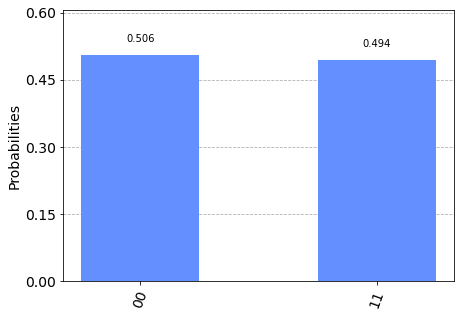

In [ ]:
plot_histogram(counts) # histogramはカウント数がInput。

### 2.Return and understand the statevector of an experiment

+ Statevectorでは、状態ベクトルを使う。
+ 可視化
  + マルチベクトルのブロッホ球
  + QShpere
  + Density（City）

In [ ]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

backend = BasicAer.get_backend('statevector_simulator') #シミュレータはStatevectorを指定する
result = execute(bell, backend).result()
statevector = result.get_statevector() # ここ
statevector

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

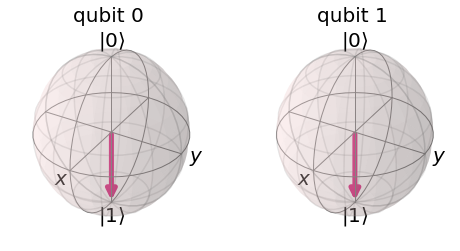

In [ ]:
plot_bloch_multivector(statevector)

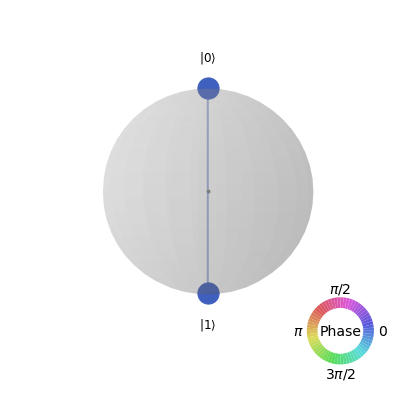

In [ ]:
plot_state_qsphere(statevector)

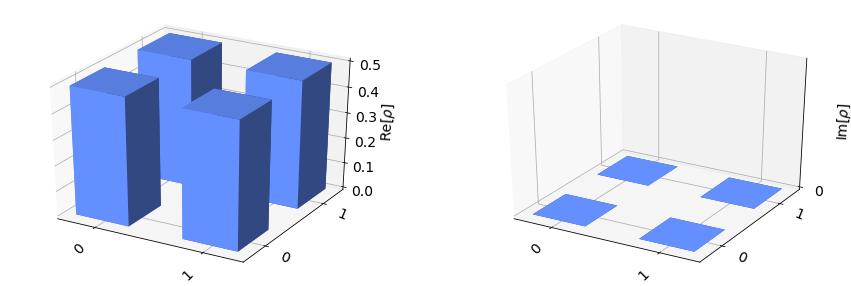

In [ ]:
plot_state_city(statevector)

### 3.Return and understand the unitary of an experiment

+ ユニタリ行列を使う

In [ ]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u(pi/2,pi/2,pi/2,q) #u3-gate
qc.draw()

┌────────────────┐
q210_0: ┤ U(π/2,π/2,π/2) ├
        └────────────────┘

In [ ]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
result.get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

## Section 7: Use Qiskit Tools1%

https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463

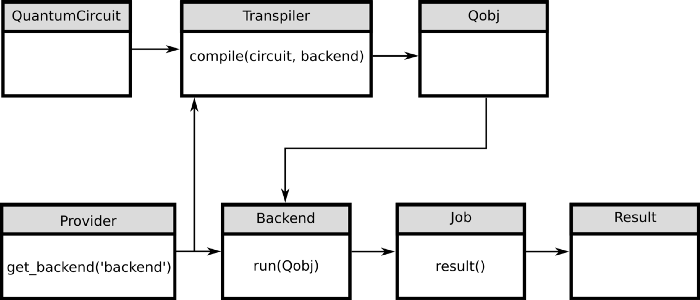

### 1.Monitor the status of a job instance

https://qiskit.org/documentation/apidoc/tools.html

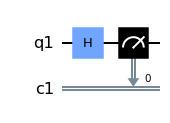

In [ ]:
# 回路準備
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.measure(q, c);

qc.draw('mpl')

In [ ]:
# API Token でアカウント保存
IBMQ.save_account(API_TOKEN)

# アカウントロード
provider = IBMQ.load_account()

# バックエンドリスト
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [ ]:
# バックエンドリスト：シミュレータのみ
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 20             Pending Jobs: 49             Pending Jobs: 52
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      174.6          Avg. T1:      101.1          Avg. T1:      84.9
Avg. T2:      57.1           Avg. T2:      129.4          Avg. T2:      103.3



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 15             Pending Jobs: 45             Pending Jobs: 1585
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True         

In [ ]:
# 空いているバックエンド、シミュレータ以外
#backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))
backend = least_busy(provider.backends(simulator=False))

In [ ]:
backend_monitor(backend)

ibmq_armonk
Configuration
-------------
    n_qubits: 1
    operational: True
    status_msg: active
    pending_jobs: 2
    backend_version: 2.4.24
    basis_gates: ['id', 'rz', 'sx', 'x']
    local: False
    simulator: False
    input_allowed: ['job', 'runtime']
    discriminators: ['quadratic_discriminator', 'linear_discriminator']
    allow_object_storage: True
    measure_esp_enabled: False
    meas_levels: [1, 2]
    conditional: False
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-\\sigma_{i}^z)/2 \\rightarrow O_i \\equiv b^\\dagger_{i} b_{i}$,\n\n$\\sigma_{+} \\rightarrow b^\\dagger$,\n\n$\\sigma_{-} \\rightarrow b$,\n\n$\\sigma_{i}^X \\rightarrow b^\\dagger_{i} + b_{i}$.\n\nQubits are coupled through resonator buses. The provided Hamiltonian has been projected into the ze

In [ ]:
# バックエンド情報
backend.name()

'ibmq_armonk'

In [ ]:
backend.status()

In [ ]:
#https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.configuration.html#qiskit.providers.ibmq.IBMQBackend.configuration
#https://github.com/Qiskit/ibm-quantum-schemas/blob/main/schemas/backend_configuration_schema.json
print('description:' + backend.configuration().description)

description:1 qubit device


In [ ]:

# バックエンド実行
job = execute(qc, backend)

# Qiskit Tool ジョブモニタリング
job_monitor(job)

Job Status: job has successfully run


In [ ]:
backend = job.backend()
backend

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [ ]:
result = job.result()
result

Result(backend_name='ibmq_armonk', backend_version='2.4.24', qobj_id='dab5ac11-7a91-4b7c-9a43-52ea28e7a71d', job_id='619cd88bcd37f33d46f280d4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 519, '0x1': 505}), header=QobjExperimentHeader(clbit_labels=[['c1', 0]], creg_sizes=[['c1', 1]], global_phase=0.7853981633974483, memory_slots=1, metadata={}, n_qubits=1, name='circuit-442', qreg_sizes=[['q199', 1]], qubit_labels=[['q199', 0]]))], date=2021-11-23 12:03:41+00:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_armonk', backend_version='2.4.24'), execution_id='62615296-4c55-11ec-a5ea-b02628f7f59e', time_taken=6.568735122680664, error=None, client_version={'qiskit-ibmq-provider': '0.16.0', 'qiskit-terra': '0.18.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0'})

In [ ]:
result.get_counts()

{'0': 519, '1': 505}

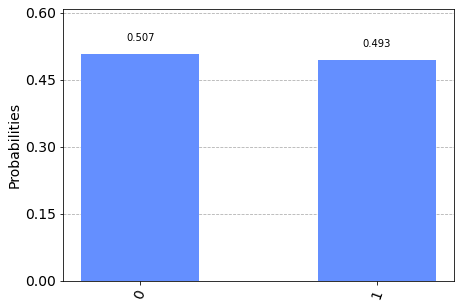

In [ ]:
plot_histogram(result.get_counts())

## Section 8: Display and Use System Information

+ <https://qiskit.org/documentation/apidoc/tools_jupyter.html>
  + %qiskit_backend_overview
  + %qiskit_job_watcher
  + %qiskit_progress_bar
  + %qiskit_version_table
  + %qiskit_copyright
  + %monospaced_output

### 1.Perform operations around the Qiskit version

https://qiskit.org/documentation/getting_started.html

+ Python 3.6 or later

Qiskit is tested and supported on the following 64-bit systems:

+ Ubuntu 16.04 or later
+ macOS 10.12.6 or later
+ Windows 7 or later

```
pip install qiskit==version
```

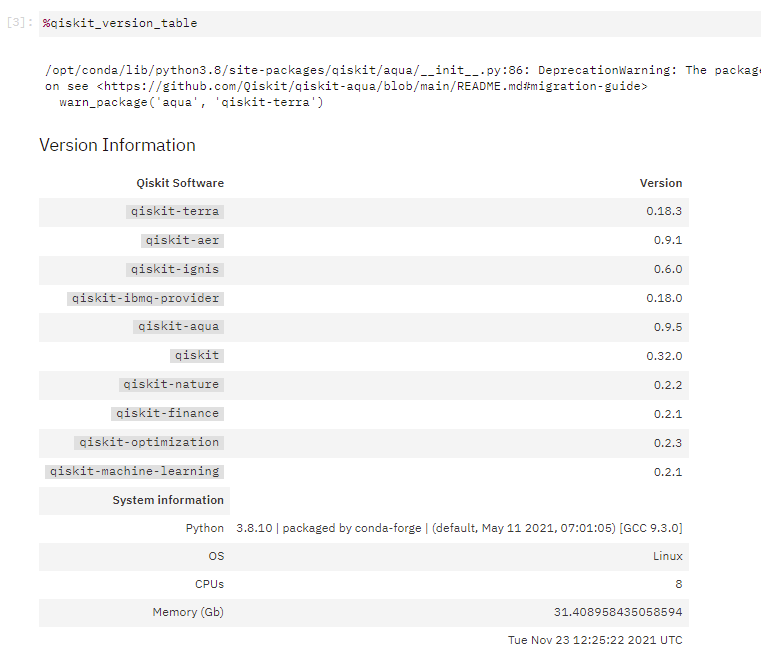

In [ ]:
# 環境のバージョン確認
qiskit.__version__

'0.18.2'

### 2.Use information gained from %quiskit_backend_overview

+ Quantum Lab で 「%qiskit_backend_overview」を実行すると、↓のUIで確認できる。
+ 量子ビット数やCXゲートによるエラー率なども確認できる。

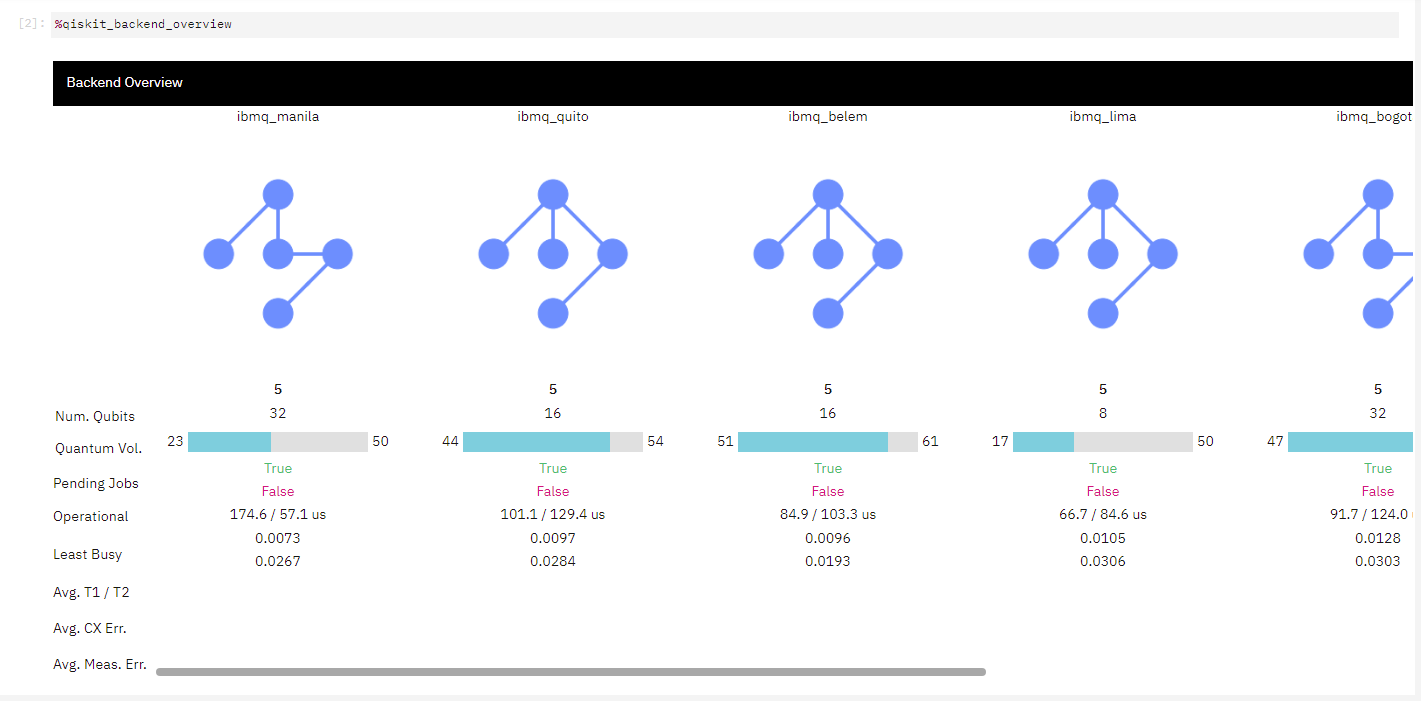

## Section 9: Construct Visualizations

+ <https://qiskit.org/documentation/apidoc/visualization.html>

### 1.Draw a circuit

+ <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html?highlight=draw#qiskit.circuit.QuantumCircuit.draw>

In [ ]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0, 1)

In [ ]:
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [ ]:
qc.draw('text')

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

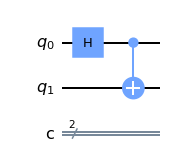

In [ ]:
qc.draw('mpl')

In [ ]:
qc.draw('latex')

In [ ]:
qc.draw('latex_source')

'\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\ctrl{1} & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\qw & \\targ & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{2}}} \\cw & \\cw & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'


### 2.Plot a histogram of data

In [ ]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

#backend = Aer.get_backend('qasm_simulator')
backend = BasicAer.get_backend('qasm_simulator')
circ = bell.compose(meas)

#result = execute(circ, backend, shots=1000).result()  # executeから実行する方法もある, transpileは自動。
result = backend.run(transpile(circ, backend), shots=1000).result()  # backendからrunする場合はtranspileが必要。

counts = result.get_counts(circ)
print(counts)

{'11': 493, '00': 507}


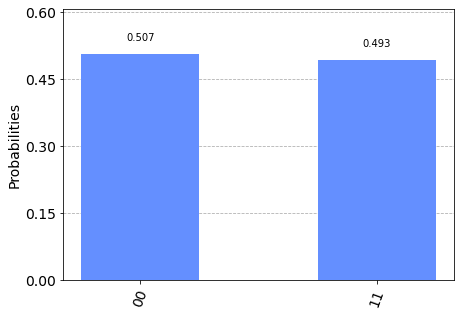

In [ ]:
plot_histogram(counts) # histogramはカウント数がInput。

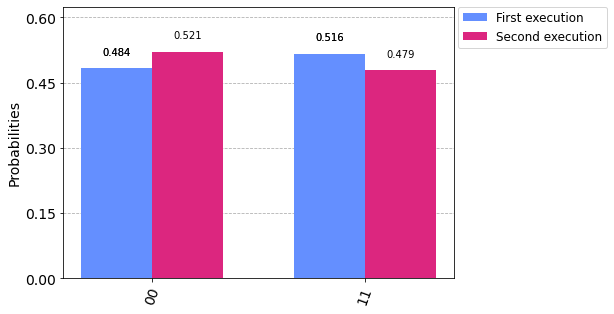

In [ ]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)

# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)  # 配列で指定することで、複数の結果をHistogramに表示できる。

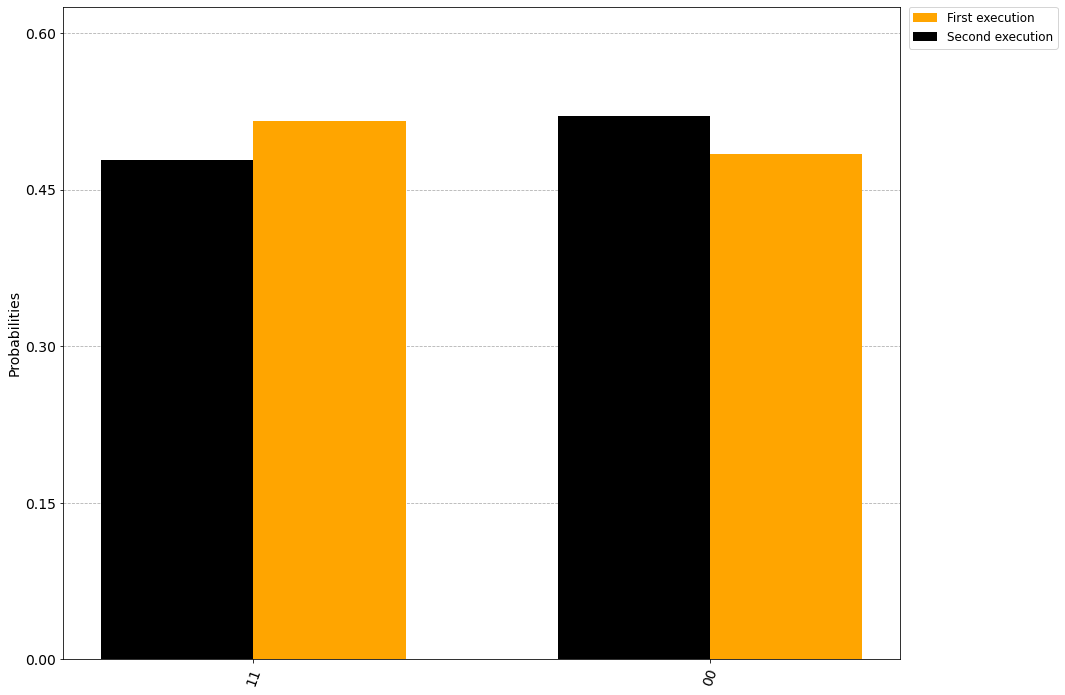

In [ ]:
# 色、順序、サイズ指定などが可能。
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)

### 3.Plot a Bloch multivector

+ <https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/2_plotting_data_in_qiskit.html>

In [ ]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

backend = BasicAer.get_backend('statevector_simulator')
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
psi = result.get_statevector(bell)
#counts = result.get_counts(circ)
print(psi)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


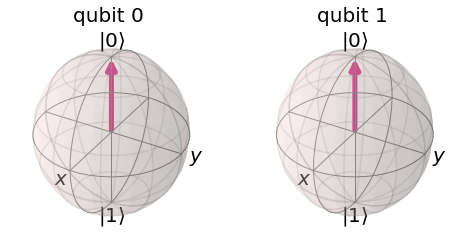

In [ ]:
plot_bloch_multivector(psi)

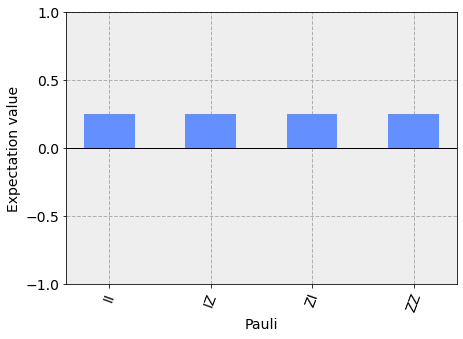

In [ ]:
# おまけ
plot_state_paulivec(psi) 

### 4.Plot a Bloch vector

'plot_bloch_vector': 量子状態を単一量子ビット空間へ射影し、ブロッホ球上にプロットする。

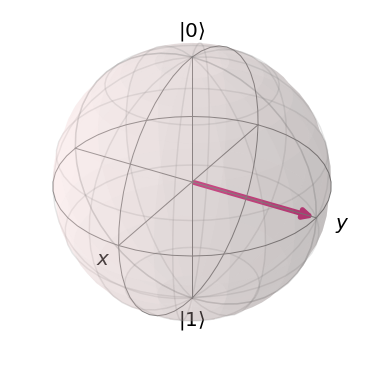

In [ ]:
plot_bloch_vector([0,1,0])

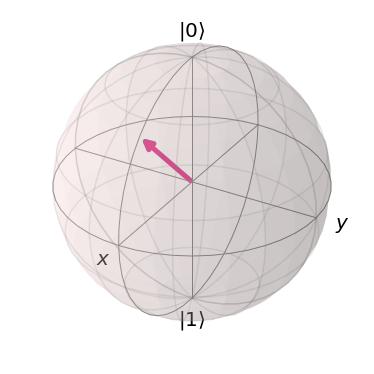

In [ ]:
plot_bloch_vector([1/sqrt(2),0,1/sqrt(2)])

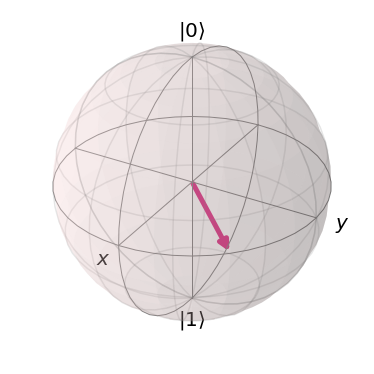

In [ ]:
plot_bloch_vector([1/sqrt(2),1/sqrt(2),0])

### 5.Plot a QSphere

+ plot_state_qsphere
  + 状態ベクトルの振幅と位相を球体にプロット。
  + 量子状態のQiskit独自ビュー。
  + 振幅は矢印の太さ（球部分の大きさ）、位相は色で表現される。

#### Bell-State

In [ ]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0,1)
#circ.measure_all() #測定すると収束する

backend = BasicAer.get_backend('statevector_simulator')
psi = execute(circ, backend).result().get_statevector(circ)
print(psi)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


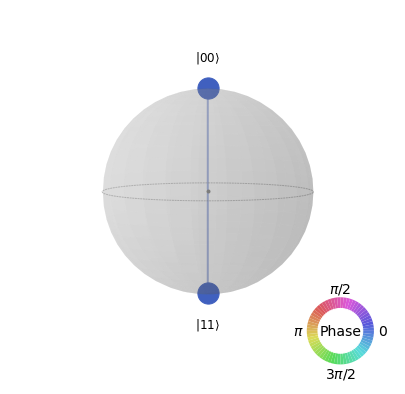

In [ ]:
plot_state_qsphere(psi)

#### 個別Hゲート

+ 2～4量子ビットで表示。
+ プロットの数が倍々に増える。

In [ ]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.h(1)

backend = BasicAer.get_backend('statevector_simulator')
psi = execute(circ, backend).result().get_statevector(circ)
print(psi)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


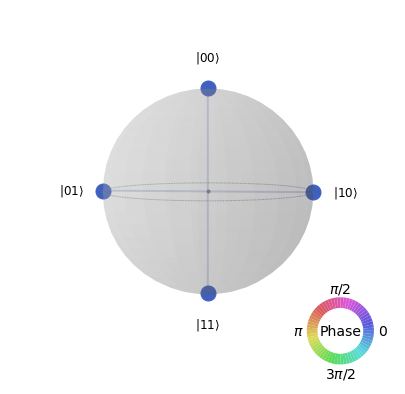

In [ ]:
plot_state_qsphere(psi)

In [ ]:
circ = QuantumCircuit(4, 2)
circ.h(0)
circ.h(1)
circ.h(2)
#circ.measure_all()

backend = BasicAer.get_backend('statevector_simulator')
psi = execute(circ, backend).result().get_statevector(circ)
print(psi)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


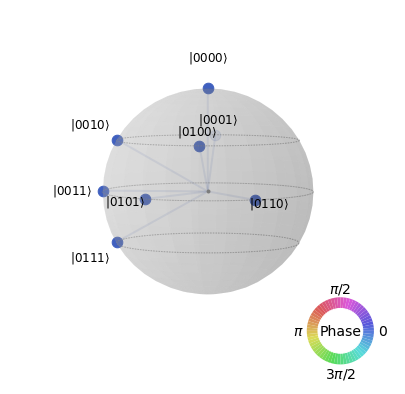

In [ ]:
plot_state_qsphere(psi)

In [ ]:
circ = QuantumCircuit(4, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
#circ.measure_all()

backend = BasicAer.get_backend('statevector_simulator')
psi = execute(circ, backend).result().get_statevector(circ)
print(psi)

[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]


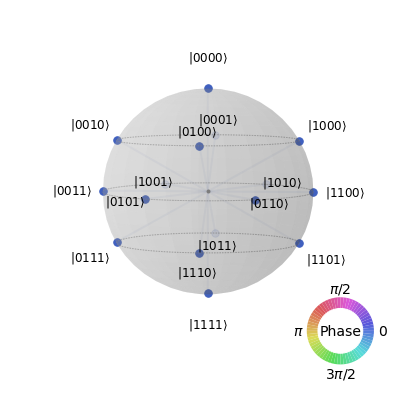

In [ ]:
plot_state_qsphere(psi)


### 6.Plot a density matrix

plot_state_city:状態行列の実部と虚部が都市のようにプロットされている、量子状態の標準的なビュー。

In [ ]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

backend = BasicAer.get_backend('statevector_simulator')
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
psi = result.get_statevector(bell)
#counts = result.get_counts(circ)
print(psi)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


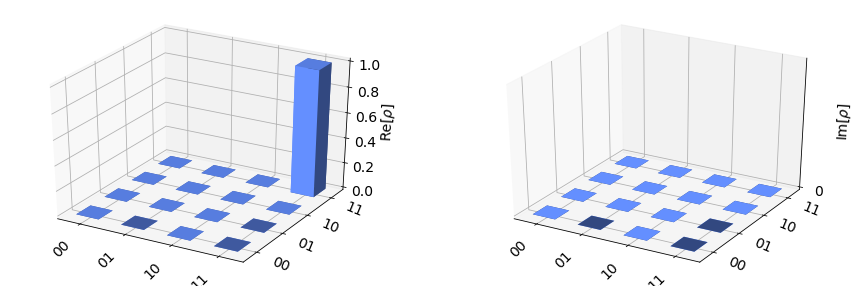

In [ ]:
plot_state_city(psi)

'plot_state_hinton': 'city' と同様だが、要素の大きさは行列要素の値を表す。

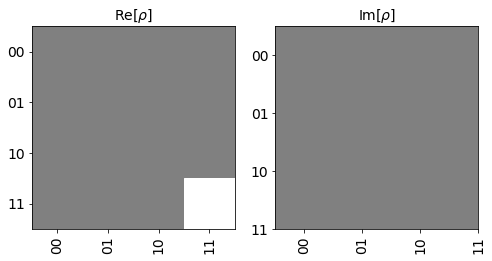

In [ ]:
plot_state_hinton(psi)

### 7.Plot a gate map with error rates

+ <https://qiskit.org/documentation/stubs/qiskit.visualization.plot_gate_map.html>

In [ ]:
# API Token でアカウント保存
IBMQ.save_account(API_TOKEN)

# アカウントロード
provider = IBMQ.load_account()

# 空いているバックエンド、シミュレータ以外
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

configrc.store_credentials:WARNING:2021-11-27 04:57:42,380: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-11-27 04:57:42,642: Credentials are already in use. The existing account in the session will be replaced.


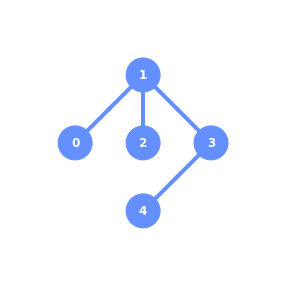

In [ ]:
plot_gate_map(backend)

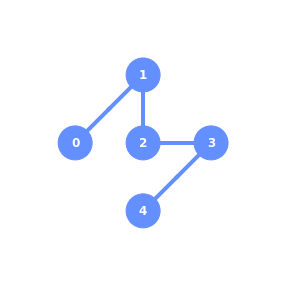

In [ ]:
backend = provider.get_backend('ibmq_manila')

plot_gate_map(backend)

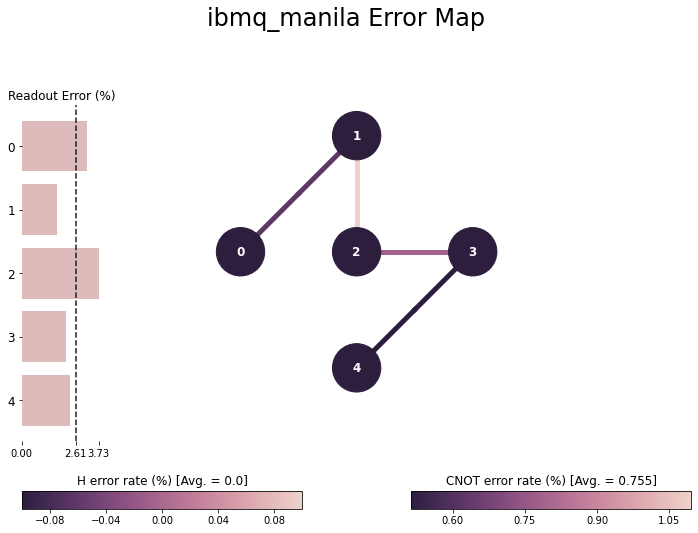

In [ ]:
plot_error_map(backend)

## Section 10: Access Aer Provider6%


### 1.Access a statevector_simulator backend

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
psi = result.get_statevector()
psi

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])


### 2.Access a qasm_simulator backend

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()
counts

{'00 00': 470, '11 00': 554}

### 3.Access a unitary_simulator backend

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)
#qc.measure_all()

backend = Aer.get_backend('unitary_simulator')
result = execute(qc, backend).result()
uni = result.get_unitary()
uni

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j]])